# Worksheet 12

Name:  DAYU LI
UID: U61453443

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
YES.  The output is a binary variable (YES or NO).
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
NO. The output is a continuous variable representing the number of months.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
YES. It represents discrete categories (ratings) rather than a continuous spectrum.
4. Predicting the number of births occuring in a specified minute.
NO. The outcome is a count of events (births), which is a continuous variable.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

To learn a model and estimate its performance on unseen data, I can split the dataset into training and test sets, use cross-validation for robust evaluation, preprocess features, select an appropriate model, and train it. Evaluate the model on the test set using relevant metrics. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when a model is too simple to capture the underlying patterns of the data, leading to poor performance on both training and test data. Signs include low accuracy or high error on both sets. 
Overfitting happens when a model learns the noise in the training data, performing well on it but poorly on unseen data. Signs include high accuracy on training data but low accuracy on test data.

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

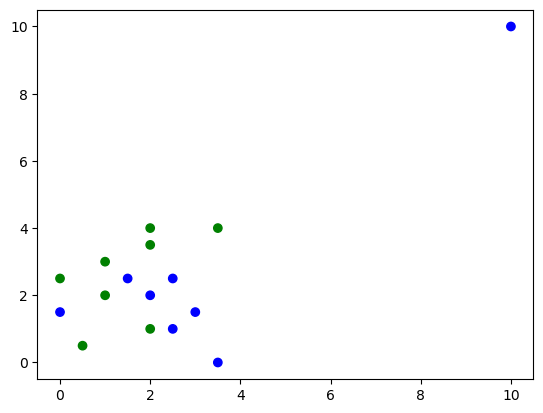

In [3]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

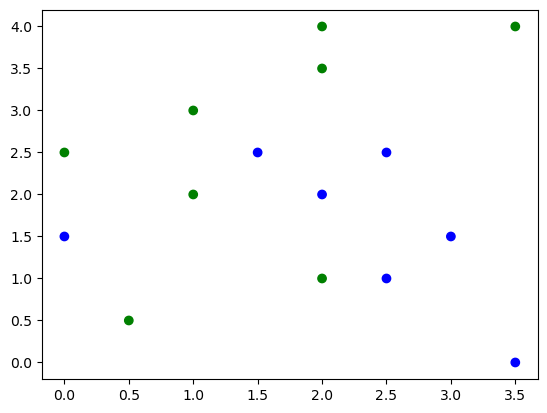

In [4]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

point A=0,B=1.5,C=0 could be a noise point. It lies in the region of 1s and was classified to 0.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

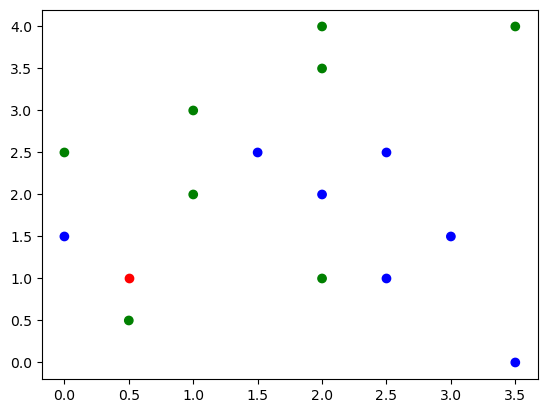

In [8]:
new_point_a = 0.5
new_point_b = 1

plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]], label='Existing Data')
plt.scatter(new_point_a, new_point_b, color='r', label='New Point')

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

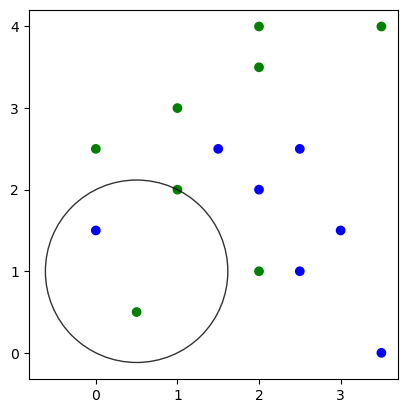

In [33]:
def n_closest_to(example, n, datap1):
    distances = []
    for point in datap1:
        dist = np.sqrt((point[1] - example[1])**2 + (point[0] - example[0])**2)
        distances.append((dist, point))
    distances.sort(key=lambda x: x[0])
    # returns points and the distance of the nth closest point
    return [x[1] for x in distances[:n]], distances[n-1][0]

location = (0.5, 1)
datap = list(zip(data["Attribute A"], data["Attribute B"]))

# Unpacking the returned values from n_closest_to correctly
closest_points, radius = n_closest_to(location, 3, datap)

_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]], label='Existing Data')
# Draw the circle using the correctly extracted radius
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [39]:
def majority_class(points):
    class_counts = {0: 0, 1: 0}
    for point in points:
        # Find the index of the point in the original dataset to get its class
          for i, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])):
            if a == point[0] and b == point[1]:
                point_class = data["Class"][i]
                class_counts[point_class] += 1
                break

    # Determine the majority class
    if class_counts[0] > class_counts[1]:
        return 0
    elif class_counts[1] > class_counts[0]:
        return 1
    else:
        # Tie-breaking with a default class
        return 0  # Default class for tie-breaking

example_point = (0.5, 1)

# Assuming we have a function `n_closest_to_v2` that returns the closest points including their distances
closest_points,a = n_closest_to(example_point, 3,datap)

# Assign class to the new point based on the majority class of the closest points
assigned_class = majority_class(closest_points)
print("Assigned class to the new point:", assigned_class)

Assigned class to the new point: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [41]:
count = 0
for i in range(len(datap)):
    actual_class = data["Class"][i]
    test_point = datap[i]
    training_points = datap[:i] + datap[i+1:]
    closest_points, _ = n_closest_to(test_point, 3, training_points)
    prediction = majority_class(closest_points)
            
    if prediction == actual_class:
        count += 1

print("overall accuracy = ",count/len(datap))

overall accuracy =  0.7333333333333333
